Load Glutamatergic Data

In [1]:
import scanpy as sc
import numpy as np
import random
import matplotlib.pyplot as plt
import scanpy.external as sce
import nsforest as ns
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)
random.seed(66)

data_path = "E:/Mouse_M1/"

adata = sc.read_h5ad(data_path + "Mouse_M1_Glut.h5ad")
adata

AnnData object with n_obs × n_vars = 85684 × 31053
    obs: 'class_label', 'cluster_label', 'batch', 'n_counts', 'leiden', 'class'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'

In [2]:
adata.X = adata.raw.X

Analyze Glutamatergic Cells

In [3]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)

extracting highly variable genes
    finished (0:00:07)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:33)


2023-05-25 14:30:00,520 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-05-25 14:30:23,343 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-05-25 14:30:24,007 - harmonypy - INFO - Iteration 1 of 20
2023-05-25 14:31:19,870 - harmonypy - INFO - Iteration 2 of 20
2023-05-25 14:32:15,263 - harmonypy - INFO - Iteration 3 of 20
2023-05-25 14:33:11,104 - harmonypy - INFO - Iteration 4 of 20
2023-05-25 14:34:06,984 - harmonypy - INFO - Iteration 5 of 20
2023-05-25 14:35:02,435 - harmonypy - INFO - Iteration 6 of 20
2023-05-25 14:35:51,579 - harmonypy - INFO - Iteration 7 of 20
2023-05-25 14:36:14,364 - harmonypy - INFO - Iteration 8 of 20
2023-05-25 14:36:36,490 - harmonypy - INFO - Iteration 9 of 20
2023-05-25 14:37:32,224 - harmonypy - INFO - Iteration 10 of 20
2023-05-25 14:38:03,259 - harmonypy - INFO - Iteration 11 of 20
2023-05-25 14:38:25,324 - harmonypy - INFO - Converged after 11 iterations


computing neighbors


c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:40)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:32)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:11)


C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


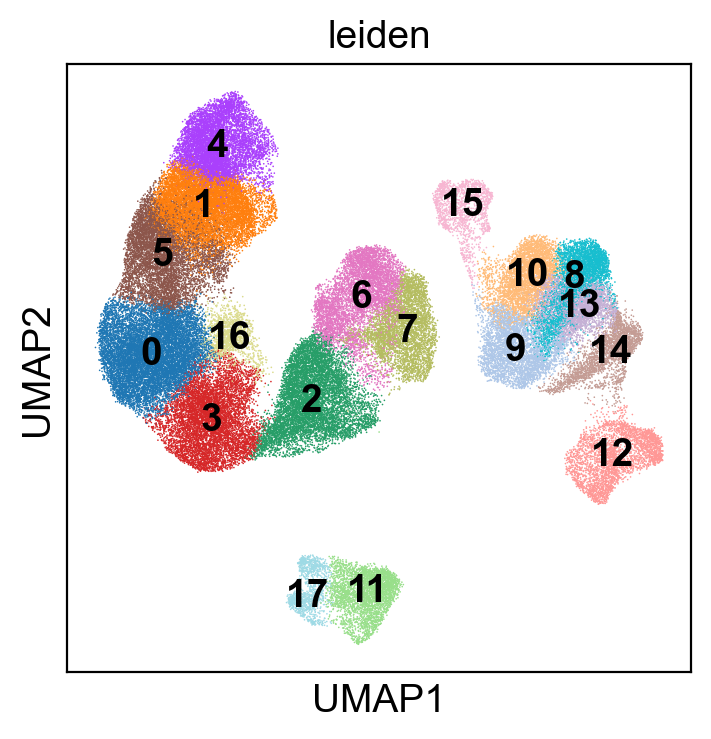

In [4]:
sc.tl.pca(adata, svd_solver="arpack")
sce.pp.harmony_integrate(adata, "batch", max_iter_harmony=20, random_state=66)
sc.pp.neighbors(adata, n_neighbors=25, use_rep="X_pca_harmony")
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden"], legend_loc="on data")

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


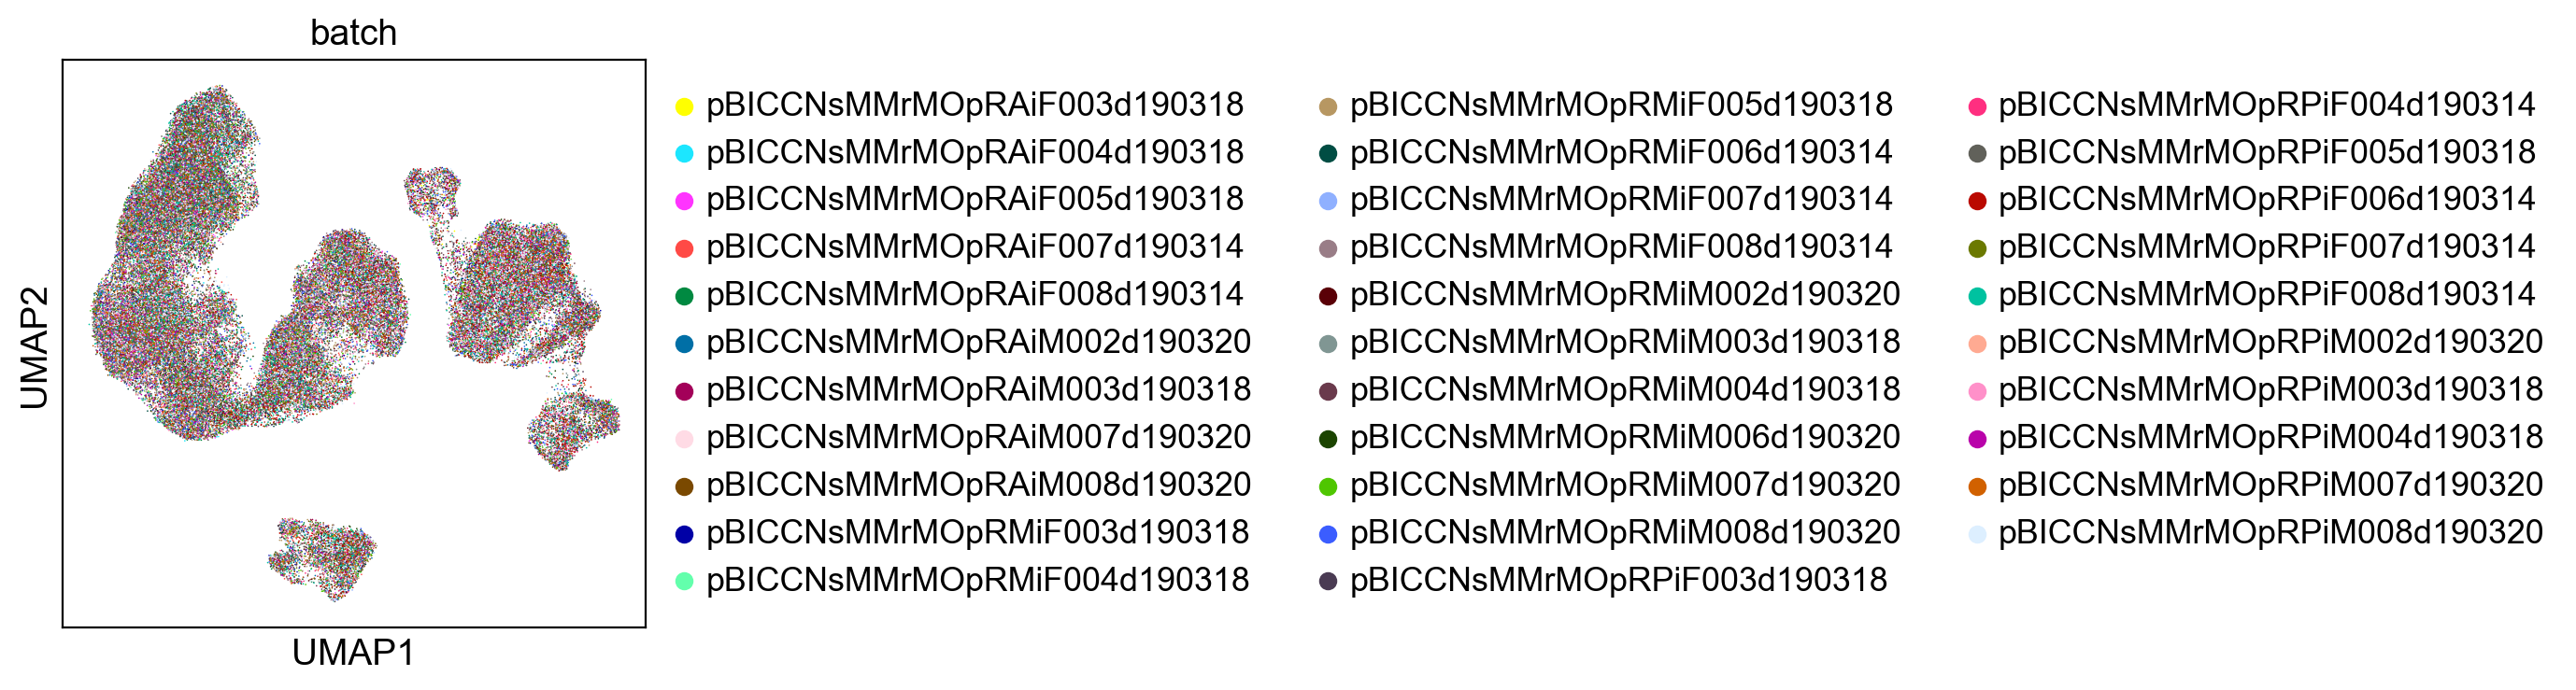

In [5]:
sc.pl.umap(adata, color=["batch"])

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


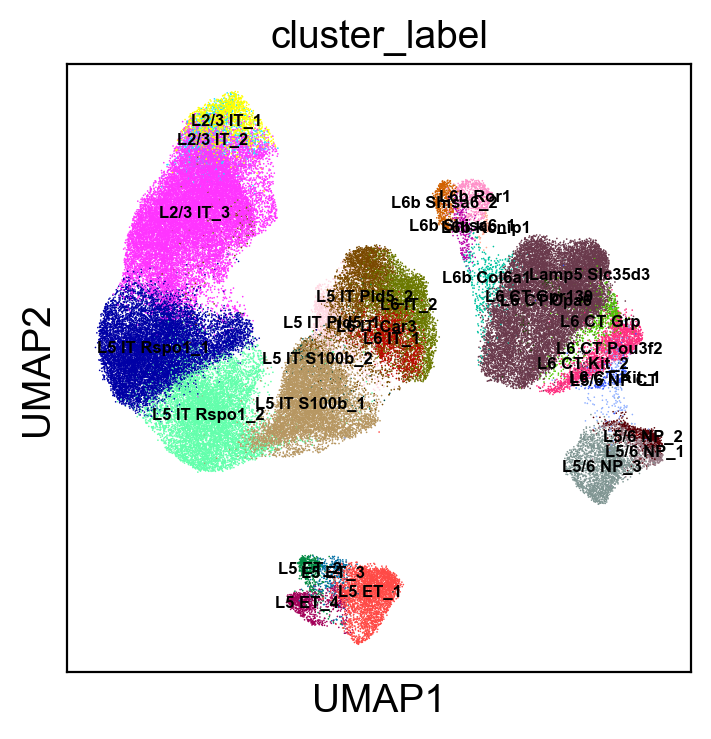

In [6]:
sc.pl.umap(adata, color=["cluster_label"], legend_loc="on data", legend_fontsize=6)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`
categories: 0, 1, 2, etc.
var_group_labels: General, 2/3, 2/3 & 4, etc.


C:\Ryan\GitHub\scanpy\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


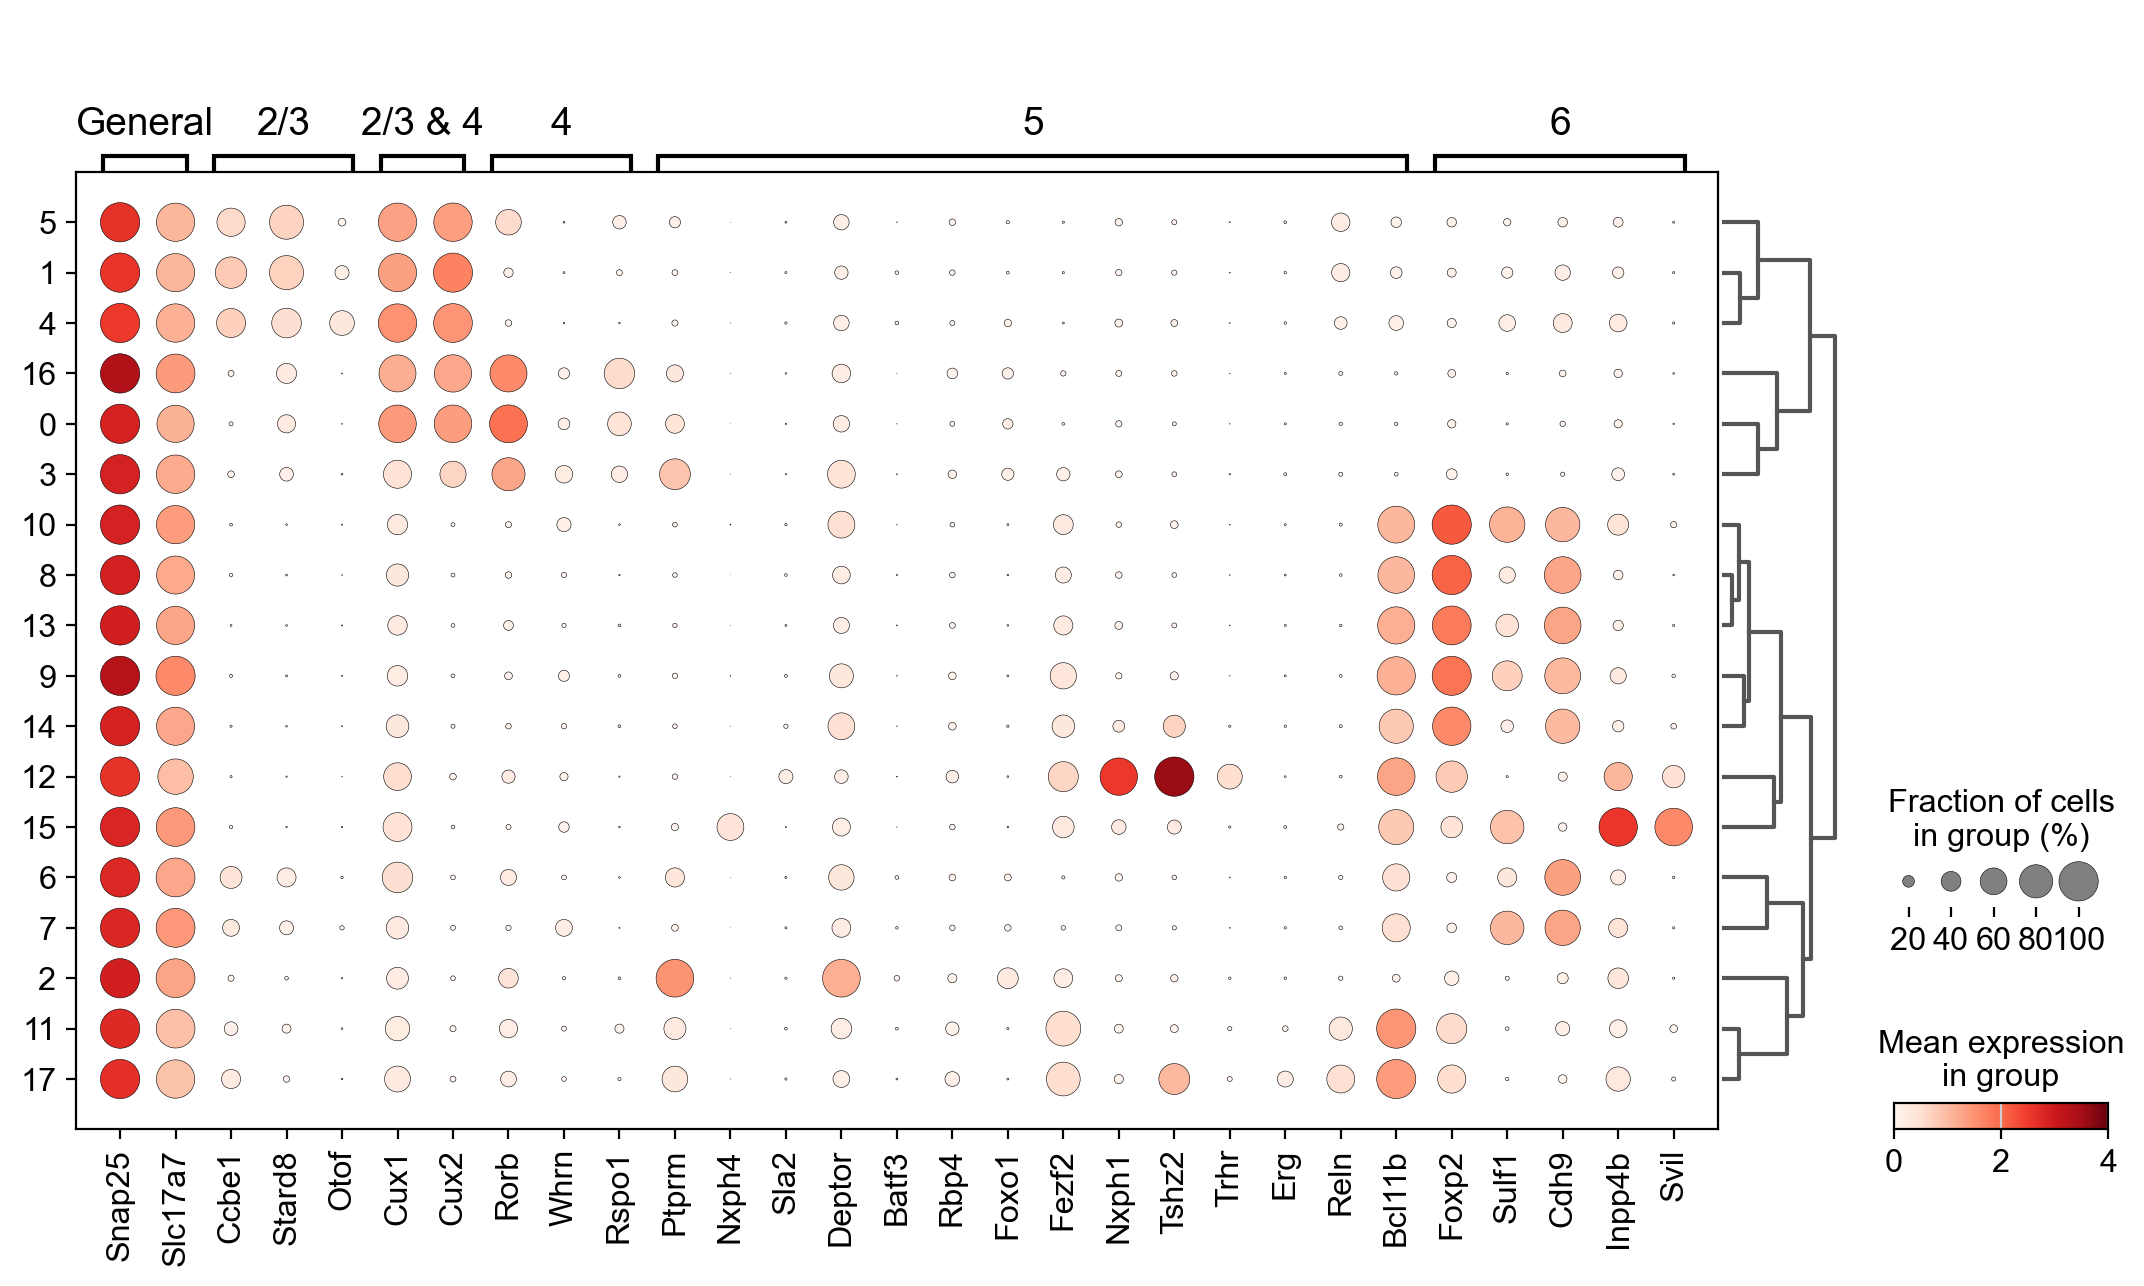

In [7]:
glutamatergic_markers = [
                         "Snap25", "Slc17a7", # general
                         "Ccbe1", "Stard8", "Otof", # L2/3
                         "Cux1", "Cux2", # L2/3 & L4
                         "Rorb", "Whrn", "Rspo1", # L4
                         "Ptprm", "Nxph4", "Sla2", 
                         "Deptor", "Batf3", "Rbp4", "Foxo1", "Fezf2", "Nxph1", "Tshz2", "Trhr", "Erg", "Reln", "Bcl11b", # L5
                         "Foxp2", "Sulf1", "Cdh9", "Inpp4b", "Svil" # L6
                        ]

sc.pl.dotplot(
    adata, 
    glutamatergic_markers, 
    groupby="leiden", 
    dendrogram=True, 
    vmin=0, vmax=4, 
    var_group_positions=[(0, 1), (2, 4), (5, 6), (7, 9), (10, 23), (24, 28)], 
    var_group_labels=["General", "2/3", "2/3 & 4", "4", "5", "6"], 
    var_group_rotation=0, 
            )

Label Subclasses via Marker Genes

In [8]:
subclass_idx = {
            "L23" : ["1", "4", "5"], 
            "L45" : ["0", "3", "16"], 
            "L5IT" : ["2"], 
            "L5ET" : ["11", "17"], 
            "L5NP" : ["12"], 
            "L6IT" : ["6", "7"], 
            "L6CT" : ["8", "9", "10", "13", "14"], 
            "L6b" : ["15"], 
               }

adata.uns["subclass_idx"] = subclass_idx

adata.obs["subclass"] = [None] * adata.shape[0]

for name, idx in subclass_idx.items():
    mask = np.isin(adata.obs["leiden"], idx)
    adata.obs.loc[mask, "subclass"] = [name] * np.sum(mask)

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


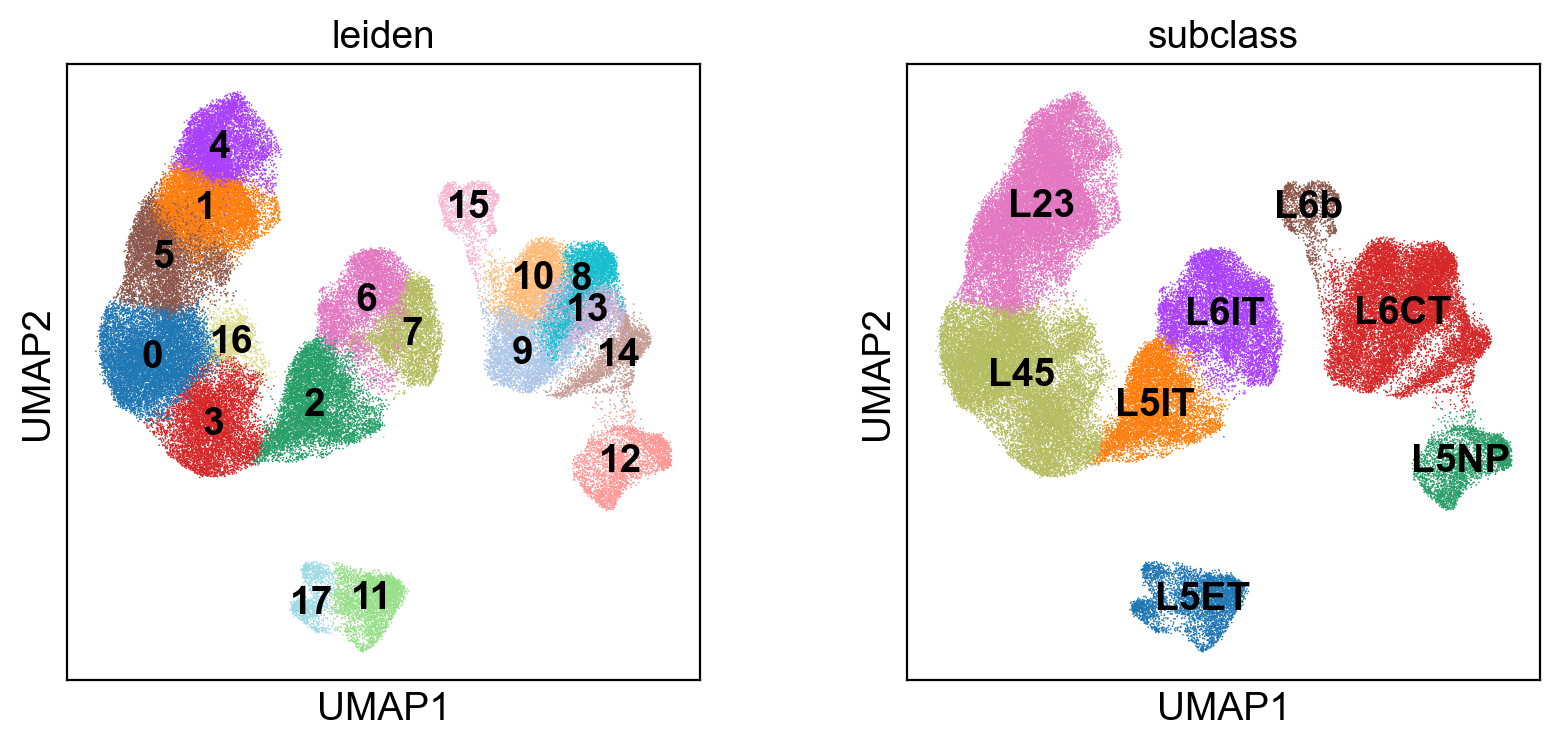

In [9]:
sc.pl.umap(adata, color=["leiden", "subclass"], legend_loc="on data")

Save Clustered AnnData Object

In [10]:
adata.write_h5ad(data_path + "Mouse_M1_Glut_Clustered.h5ad")

Load Clustered AnnData Object for Differential Expression Analysis

In [ ]:
import scanpy as sc
import numpy as np
import random
import matplotlib.pyplot as plt
import scanpy.external as sce
import nsforest as ns
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)
random.seed(66)

data_path = "G:/Shared drives/Opossum transcriptomics/Data/Mouse_M1/"

adata = sc.read_h5ad(data_path + "Mouse_M1_Glut_Clustered.h5ad")
adata

In [3]:
adata.X = adata.raw.X.toarray()

Find Marker Genes for Clusters Among Subclasses

In [ ]:
n_trees, n_top_genes, n_binary_genes, n_genes_eval = 10000, 15, 10, 6

for name in adata.uns["subclass_idx"].keys():

    if name not in ["L5IT", "L5NP", "L6b"]: # these subclasses contain only one cluster
    
        mask = np.isin(adata.obs["subclass"], [name])
        adata_masked = adata[mask, :]
        
        results = ns.NSForest(
                            adata_masked, 
                            cluster_header="leiden", 
                            cluster_list=[], 
                            n_trees=n_trees, 
                            n_top_genes=n_top_genes, 
                            n_binary_genes=n_binary_genes, 
                            n_genes_eval=n_genes_eval, 
                            output_folder=data_path + "NSForest/", 
                              )

        results.to_csv(data_path + "NSForest/{0}_results_{1}_{2}_{3}_{4}.csv".format(name, n_trees, n_top_genes, n_binary_genes, n_genes_eval))

        del adata_masked

Read NS-Forest Output and Make Plots

In [ ]:
import pandas as pd
from ast import literal_eval

results = pd.read_csv(data_path + "NSForest/L45_results_10000_15_10_6.csv").drop("Unnamed: 0", axis=1)
results["clusterName"] = results["clusterName"].astype(str)
results["NSForest_markers"] = results["NSForest_markers"].apply(literal_eval)
results["binary_genes"] = results["binary_genes"].apply(literal_eval)
results

In [74]:
mask = np.isin(adata.obs["subclass"], ["L45"])
adata_masked = adata[mask, :]

In [ ]:
markers = dict(zip(results['clusterName'], results['binary_genes']))
sc.pl.stacked_violin(adata_masked, markers, groupby="leiden", swap_axes=False)

In [ ]:
sc.pl.dotplot(adata_masked, markers, groupby="leiden", swap_axes=False)

In [ ]:
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

all_markers = []
[all_markers.extend(markers) for markers in results["binary_genes"]]

df_X = pd.DataFrame(adata_masked.raw[:, all_markers].X.toarray(), index=adata_masked.obs_names, columns=all_markers) #cell-by-gene
clusters = adata_masked.obs["leiden"]
df_X_clusters = pd.concat([df_X, clusters], axis=1)

matrix = np.array(df_X_clusters.sort_values(by=["leiden"], key=lambda col: col.str.lower()).drop(["leiden"], axis=1))

fig, ax = plt.subplots()
ax.matshow(zscore(matrix, axis=0), cmap="RdBu_r", aspect=2000 / np.prod(matrix.shape), vmin=-4, vmax=4) # 
ax.set_xticks(np.arange(0, len(all_markers), 1))
ax.set_xticklabels(all_markers, rotation=90, fontsize=10)
ax.set_yticks(())
ax.grid(False)
x_min, y_min, x_max, y_max = list(ax.get_position().get_points().flatten())
# fig.patches.extend([Rectangle((x_min, y_min), 0.005, 0.8, fill=True, color=(0.5, 0.5, 0.5), transform=fig.transFigure, figure=fig)])
fig.set_size_inches(8, 10)
plt.show(block=False)